<a href="https://colab.research.google.com/github/ManasiDhotkar/Sentimental_Analysis/blob/main/WomensClothingReviews" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING CASE STUDY**

# SENTIMENT ANALYSIS

BY:

UCE2021402 - SALONI BHAGAT

UCE2021409 - KOMAL CHAUDHARI

UCE2021415 - MANASI DHOTKAR

In [ ]:
# Importing Libraries

# general libraries
import io # manage file related input/output operations
from google.colab import files # allows to import files
import pandas as pd # represent data in the form of dataframe
import numpy as np # work with arrays
import matplotlib.pyplot as plt # plot graphs
import seaborn as sns # plot statistical graphs
import re # Regular Expressions
import string # importing string functions

# Natural Langugage ToolKit Libraries
import nltk # natural langugage toolkit
from nltk.tokenize import word_tokenize # split sentence into words
from nltk.corpus import stopwords # words that do not add much meaning to sentences (is,a,an,etc)
from nltk.stem import WordNetLemmatizer # lemmatize the words into its root word (understands the context and changes the word)
from nltk.stem.porter import PorterStemmer # stems words into root words (remove few characters and changes the word, can we non meaningful as well)

# Warning msg library
import warnings # waring msgs
warnings.filterwarnings('ignore') # ignores the warning msgs

# Sklearn libraries
from sklearn import preprocessing # transform texual data into numbers
from sklearn.utils import resample # resamples arrays or matrices
from sklearn.metrics import f1_score # calculates f1 score of the model
from sklearn.metrics import recall_score # calculates recall value of the model
from sklearn.metrics import accuracy_score # calculates accuracy of the model
from sklearn.metrics import precision_score # calculates precision of the model
from sklearn.metrics import confusion_matrix # prints confusion matrix of the model
from sklearn.naive_bayes import MultinomialNB # assign data to classes based on statistical analysis and content
from sklearn.model_selection import train_test_split # split dataset into traning and testing dataset
from sklearn.feature_extraction.text import CountVectorizer # convert text to words be preprocessing data

# Textblob library
from textblob import TextBlob # calculate sentences polarity

In [ ]:
# reading The Data
## Upload the csv file into dataframe
uploaded=files.upload()
# data can be kept as bytes in a memory buffer
df=pd.read_csv(io.BytesIO(uploaded['womenreviews.csv']))
print("Original Dataset: ")
df.head() # print first five rows of dataset

Saving womenreviews.csv to womenreviews (1).csv
Original Dataset: 


Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
# group the data according to rating and recommended IND
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

In [ ]:
# DataFrame text_df consists of a subset of columns from the original DataFrame df.
# Specifically, it selects the columns 'Title', 'Review Text', and 'Recommended IND' using double square brackets [['Title', 'Review Text', 'Recommended IND']]
text_df = df[['Title', 'Review Text', 'Recommended IND']]
text_df.head()

Title                                        Review Text  \
0                      NaN  Absolutely wonderful - silky and sexy and comf...   
1                      NaN  Love this dress!  it's sooo pretty.  i happene...   
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My favorite buy!  I love, love, love this jumpsuit. it's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [ ]:
# print shape of data (no. of rows and columns)
print("Data's shape is:", text_df.shape)
text_df.head()

Data's shape is: (23486, 3)


Title                                        Review Text  \
0                      NaN  Absolutely wonderful - silky and sexy and comf...   
1                      NaN  Love this dress!  it's sooo pretty.  i happene...   
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My favorite buy!  I love, love, love this jumpsuit. it's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [ ]:
# adding a new column to the text_df DataFrame, which concatenates the 'Title' column and
# the 'Review Text' column with a space separator between them,
# and assigns it to a new column called 'Review'.
text_df['Review'] = text_df['Title'] + ' ' + text_df['Review Text']
text_df = text_df.drop(labels=['Title','Review Text'] , axis=1)
text_df.head()

Recommended IND                                             Review
0                1                                                NaN
1                1                                                NaN
2                0  Some major design flaws I had such high hopes ...
3                1  My favorite buy! I love, love, love this jumps...
4                1  Flattering shirt This shirt is very flattering...

In [ ]:
# rename the recommanded IND column
text_df = text_df.rename(columns={"Recommended IND": "Recommended"})

In [ ]:
# removing the duplicates
print("Before dropping text_df: ",text_df.shape)
text_df.drop_duplicates(inplace = True)
print("After dropping text_df: ",text_df.shape)

Before dropping text_df:  (23486, 2)
After dropping text_df:  (19673, 2)


In [ ]:
# removing NaN (Null values)
text_df.dropna(inplace=True)
text_df.head()
print("After dropping NaN text_df: ",text_df.shape)

After dropping NaN text_df:  (19671, 2)


In [ ]:
# Display the count of recommended and not recommended product
text_df['Recommended'].value_counts()

1    16096
0     3575
Name: Recommended, dtype: int64

In [ ]:
# create two different dataframe of majority and minority class
df_majority = text_df[(text_df['Recommended']==1)]
df_minority = text_df[(text_df['Recommended']==0)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class
                                 random_state=42)  # reproducible result
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# create column cleaned review by removing words starting with @
df_upsampled["Cleaned_Review"] = np.vectorize(remove_pattern)(df_upsampled["Review"], "@[\w]*")

In [ ]:
# Remove special characters, numbers and punctuations
df_upsampled["Cleaned_Review"] = df_upsampled["Cleaned_Review"].str.replace("[^a-zA-Z#]", " ")
df_upsampled.head()

Recommended                                             Review  \
20700            0  Very large; lace is kinda coarse Thought i'd l...   
23020            0  Way too much fabric I wanted to love this jump...   
5625             0  So surprised by the poor quality I loved the l...   
8695             0  Runs large I so wanted to love this tank, and ...   
7689             0  If you have a chest, beware I got this top in ...   

                                          Cleaned_Review  
20700  Very large  lace is kinda coarse Thought i d l...  
23020  Way too much fabric I wanted to love this jump...  
5625   So surprised by the poor quality I loved the l...  
8695   Runs large I so wanted to love this tank  and ...  
7689   If you have a chest  beware I got this top in ...

In [ ]:
# Removing short words (words with length less than 3)
df_upsampled["Cleaned_Review"] = df_upsampled["Cleaned_Review"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df_upsampled.head()

Recommended                                             Review  \
20700            0  Very large; lace is kinda coarse Thought i'd l...   
23020            0  Way too much fabric I wanted to love this jump...   
5625             0  So surprised by the poor quality I loved the l...   
8695             0  Runs large I so wanted to love this tank, and ...   
7689             0  If you have a chest, beware I got this top in ...   

                                          Cleaned_Review  
20700  Very large lace kinda coarse Thought love this...  
23020  much fabric wanted love this jumpsuit looks ad...  
5625   surprised poor quality loved look this sweater...  
8695   Runs large wanted love this tank excited mail ...  
7689   have chest beware this typical size medium wan...

In [ ]:
# tokenize the data convert sentence to words
tokenized_tweet = df_upsampled["Cleaned_Review"].apply(lambda x: x.split())
tokenized_tweet.head()

20700    [Very, large, lace, kinda, coarse, Thought, lo...
23020    [much, fabric, wanted, love, this, jumpsuit, l...
5625     [surprised, poor, quality, loved, look, this, ...
8695     [Runs, large, wanted, love, this, tank, excite...
7689     [have, chest, beware, this, typical, size, med...
Name: Cleaned_Review, dtype: object

In [ ]:
# remove stopwords
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Noise Removal (Punctuation)
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [ ]:
# processed_text
processed_text=remove_punc(str(df_upsampled["Cleaned_Review"]))
processed_text

'20700    Very large lace kinda coarse Thought love this\n23020    much fabric wanted love this jumpsuit looks ad\n5625     surprised poor quality loved look this sweater\n8695     Runs large wanted love this tank excited mail \n7689     have chest beware this typical size medium wan\n                                                       \n23479    What piece wasn sure about ordering this skirt\n23481    Great dress many occasions very happy snag thi\n23482    Wish made cotton reminds maternity clothes sof\n23484    Very cute dress perfect summer parties bought \n23485    Please make more like this This dress lovely p\nName Cleaned_Review Length 31635 dtype object'

In [ ]:
# tokenizes text into a list of words.
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [ ]:
# preprocess a string of text, convert it to lowercase, and tokenize it into a list of words
tokenized_data=tokenizze(processed_text.lower())
tokenized_data

['20700',
 'very',
 'large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'this',
 '23020',
 'much',
 'fabric',
 'wanted',
 'love',
 'this',
 'jumpsuit',
 'looks',
 'ad',
 '5625',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'this',
 'sweater',
 '8695',
 'runs',
 'large',
 'wanted',
 'love',
 'this',
 'tank',
 'excited',
 'mail',
 '7689',
 'have',
 'chest',
 'beware',
 'this',
 'typical',
 'size',
 'medium',
 'wan',
 '23479',
 'what',
 'piece',
 'wasn',
 'sure',
 'about',
 'ordering',
 'this',
 'skirt',
 '23481',
 'great',
 'dress',
 'many',
 'occasions',
 'very',
 'happy',
 'snag',
 'thi',
 '23482',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 '23484',
 'very',
 'cute',
 'dress',
 'perfect',
 'summer',
 'parties',
 'bought',
 '23485',
 'please',
 'make',
 'more',
 'like',
 'this',
 'this',
 'dress',
 'lovely',
 'p',
 'name',
 'cleaned_review',
 'length',
 '31635',
 'dtype',
 'object']

In [ ]:
# remove numbers from the list of words
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num
textwithoutnum= remove_num(tokenized_data)
textwithoutnum

['very',
 'large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'this',
 'much',
 'fabric',
 'wanted',
 'love',
 'this',
 'jumpsuit',
 'looks',
 'ad',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'this',
 'sweater',
 'runs',
 'large',
 'wanted',
 'love',
 'this',
 'tank',
 'excited',
 'mail',
 'have',
 'chest',
 'beware',
 'this',
 'typical',
 'size',
 'medium',
 'wan',
 'what',
 'piece',
 'wasn',
 'sure',
 'about',
 'ordering',
 'this',
 'skirt',
 'great',
 'dress',
 'many',
 'occasions',
 'very',
 'happy',
 'snag',
 'thi',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 'very',
 'cute',
 'dress',
 'perfect',
 'summer',
 'parties',
 'bought',
 'please',
 'make',
 'more',
 'like',
 'this',
 'this',
 'dress',
 'lovely',
 'p',
 'name',
 'length',
 'dtype',
 'object']

In [ ]:
# remove stopwords from the list of words
def remove_stops(df):
    newdata=[t for t in df if t not in new_stopping_words]
    return newdata
data=remove_stops(textwithoutnum)
data

['large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'much',
 'fabric',
 'wanted',
 'love',
 'jumpsuit',
 'looks',
 'ad',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'sweater',
 'runs',
 'large',
 'wanted',
 'love',
 'tank',
 'excited',
 'mail',
 'chest',
 'beware',
 'typical',
 'size',
 'medium',
 'wan',
 'piece',
 'wasn',
 'sure',
 'ordering',
 'skirt',
 'great',
 'dress',
 'many',
 'occasions',
 'happy',
 'snag',
 'thi',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 'cute',
 'dress',
 'perfect',
 'summer',
 'parties',
 'bought',
 'please',
 'make',
 'like',
 'dress',
 'lovely',
 'p',
 'name',
 'length',
 'dtype',
 'object']

In [ ]:
# lemmatize the data --> eg convert words like walking, walked to root word walk
def lemmatizze(df):
    newdata= [WordNetLemmatizer().lemmatize(t) for t in df]
    return newdata
final_data=lemmatizze(data)
final_data

['large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'much',
 'fabric',
 'wanted',
 'love',
 'jumpsuit',
 'look',
 'ad',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'sweater',
 'run',
 'large',
 'wanted',
 'love',
 'tank',
 'excited',
 'mail',
 'chest',
 'beware',
 'typical',
 'size',
 'medium',
 'wan',
 'piece',
 'wasn',
 'sure',
 'ordering',
 'skirt',
 'great',
 'dress',
 'many',
 'occasion',
 'happy',
 'snag',
 'thi',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 'cute',
 'dress',
 'perfect',
 'summer',
 'party',
 'bought',
 'please',
 'make',
 'like',
 'dress',
 'lovely',
 'p',
 'name',
 'length',
 'dtype',
 'object']

In [ ]:
# concatenate a list of tokenized words into a single string
joined_data=" ".join(final_data)
joined_data

'large lace kinda coarse thought love much fabric wanted love jumpsuit look ad surprised poor quality loved look sweater run large wanted love tank excited mail chest beware typical size medium wan piece wasn sure ordering skirt great dress many occasion happy snag thi wish made cotton reminds maternity clothes sof cute dress perfect summer party bought please make like dress lovely p name length dtype object'

In [ ]:
# Cleaning data
def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    final_data=lemmatizze(data)
    return " ".join(final_data)
text = Cleaning_process(str(df_upsampled["Cleaned_Review"]))
text

'large lace kinda coarse thought love much fabric wanted love jumpsuit look ad surprised poor quality loved look sweater run large wanted love tank excited mail chest beware typical size medium wan piece wasn sure ordering skirt great dress many occasion happy snag thi wish made cotton reminds maternity clothes sof cute dress perfect summer party bought please make like dress lovely p name length dtype object'

In [ ]:
# apply cleaning and preprocessing and store it in same column
df_upsampled["Cleaned_Review"]= df_upsampled["Cleaned_Review"].apply(Cleaning_process)
df_upsampled

Recommended                                             Review  \
20700            0  Very large; lace is kinda coarse Thought i'd l...   
23020            0  Way too much fabric I wanted to love this jump...   
5625             0  So surprised by the poor quality I loved the l...   
8695             0  Runs large I so wanted to love this tank, and ...   
7689             0  If you have a chest, beware I got this top in ...   
...            ...                                                ...   
23479            1  What a fun piece! So i wasn't sure about order...   
23481            1  Great dress for many occasions I was very happ...   
23482            1  Wish it was made of cotton It reminds me of ma...   
23484            1  Very cute dress, perfect for summer parties an...   
23485            1  Please make more like this one! This dress in ...   

                                          Cleaned_Review  
20700  large lace kinda coarse thought love sucker la...  
23020  much fabric wanted love jumpsuit look adorable...  
5625   surprised poor quality loved look sweater work...  
8695   run large wanted love tank excited mail size s...  
7689   chest beware typical size medium wanted love g...  
...                                                  ...  
23479  piece wasn sure ordering skirt couldn person f...  
23481  great dress many occasion happy snag dress gre...  
23482  wish made cotton reminds maternity clothes sof...  
23484  cute dress perfect summer party bought dress w...  
23485  please make like dress lovely platinum feminin...  

[31635 rows x 3 columns]

In [ ]:
# Define a function to get the polarity of a review
def get_sentiment_polarity(review):
    # Returns the sentiment polarity of a review.
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add the polarity column to the df_upsampled dataframe
df_upsampled['Sentiment_Polarity'] = df_upsampled['Cleaned_Review'].apply(get_sentiment_polarity)

# Print the Review and Sentiment_Polarity columns of the first 5 rows of the dataframe
print(df_upsampled[['Review', 'Sentiment_Polarity']].head(5))

                                                  Review Sentiment_Polarity
20700  Very large; lace is kinda coarse Thought i'd l...           Positive
23020  Way too much fabric I wanted to love this jump...           Positive
5625   So surprised by the poor quality I loved the l...           Positive
8695   Runs large I so wanted to love this tank, and ...           Positive
7689   If you have a chest, beware I got this top in ...           Positive


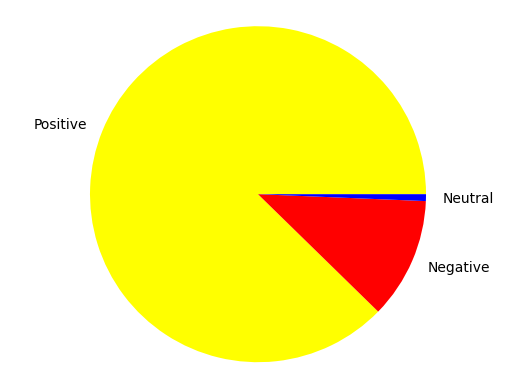

In [ ]:
# Get the count of each sentiment polarity
sentiment_counts = df_upsampled['Sentiment_Polarity'].value_counts()
# Create a pie chart
labels = sentiment_counts.index.tolist()
sizes = sentiment_counts.tolist()
colors = ['yellow', 'red', 'blue']
plt.pie(sizes, labels=labels, colors=colors)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

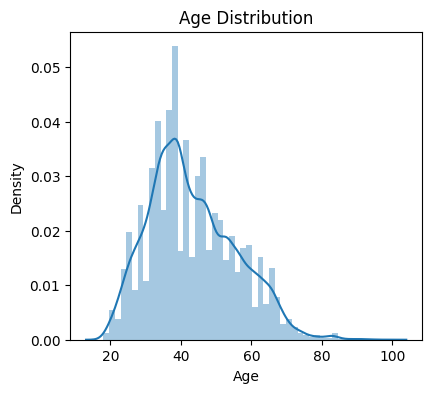

In [ ]:
# The majority of customers age between 30 and 50 yeare old.
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.title = ('Age_distribution')
sns.distplot(df['Age']).set_title("Age Distribution")
# It shows the distribution of ages in the dataset as a probability density function

In [ ]:
# install wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


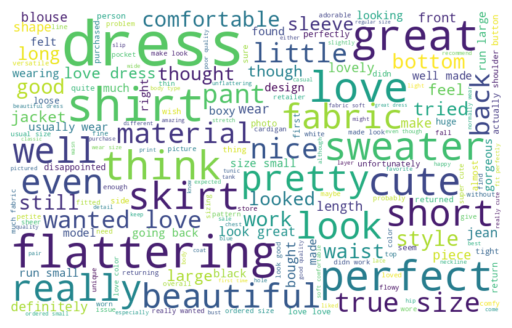

In [ ]:
# Visualizing the Keywords
all_words = " ".join([sentence for sentence in df_upsampled["Cleaned_Review"]]) #Combines all the sentences into a single string
# Word cloud: A word cloud can be used to visualize the most frequently occurring words in positive and negative sentiment categories.
# This type of chart is useful for identifying the most important words associated with different sentiments
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

# Plotting the graph
plt.figure(figsize = (10, 4))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

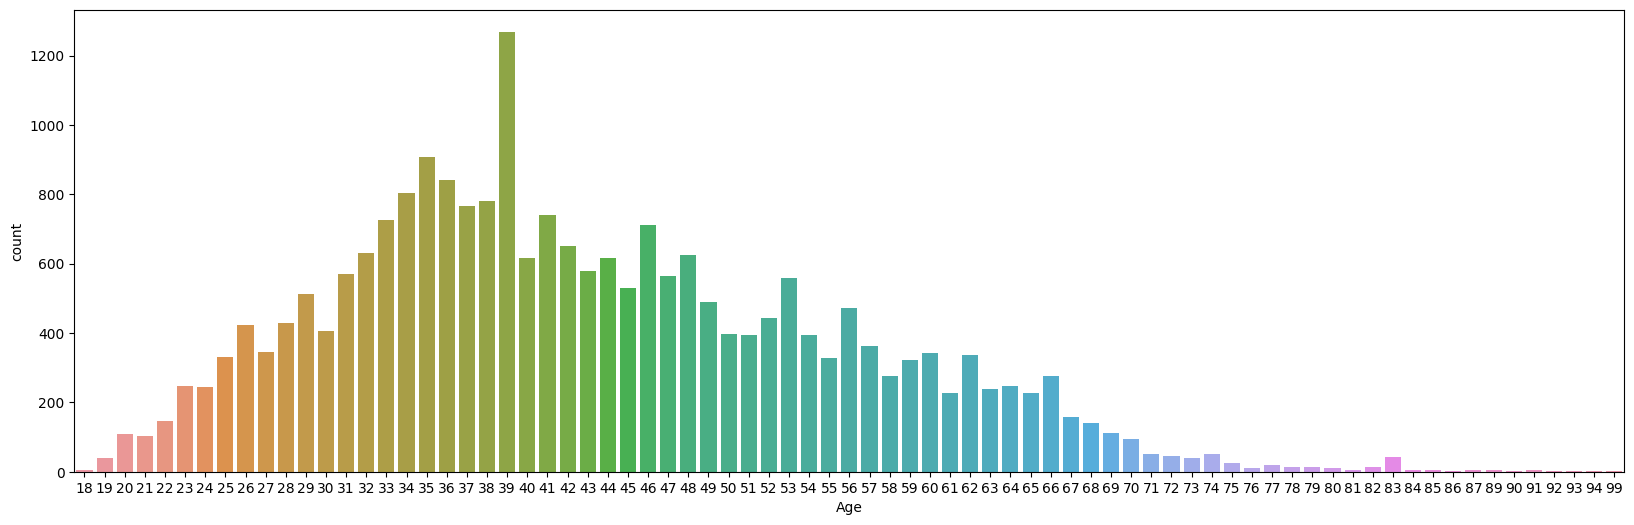

In [ ]:
# no. of different age group of people
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()
# It shows the number of occurrences of each age group as a bar plot.

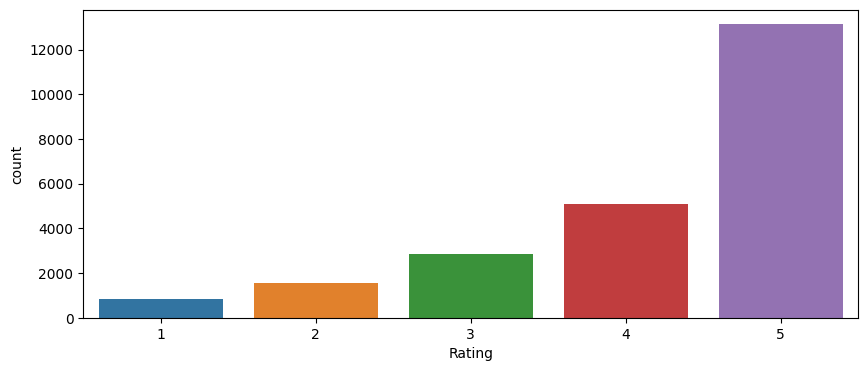

In [ ]:
# number of ratings from 1 to 5
plt.figure(figsize = (10,4))
sns.countplot(x = 'Rating', data = df)
plt.show()

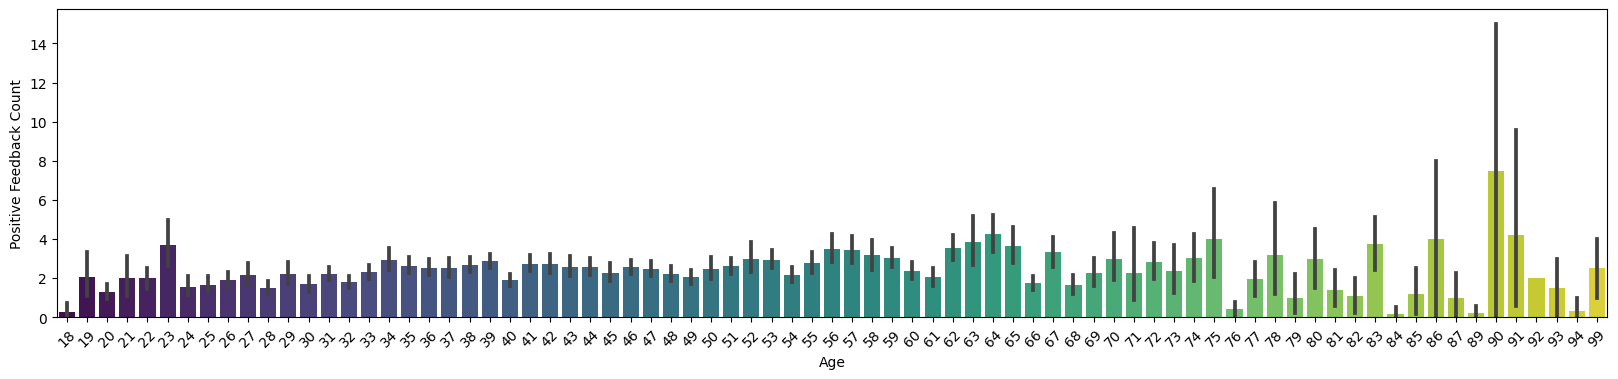

In [ ]:
# Plotting Number of Positive Feedback PER Age Group
plt.figure(figsize = (20,4))
sns.barplot(x ='Age',y= 'Positive Feedback Count',data = df, palette = 'viridis')
plt.xticks(rotation = 45)
plt.show()

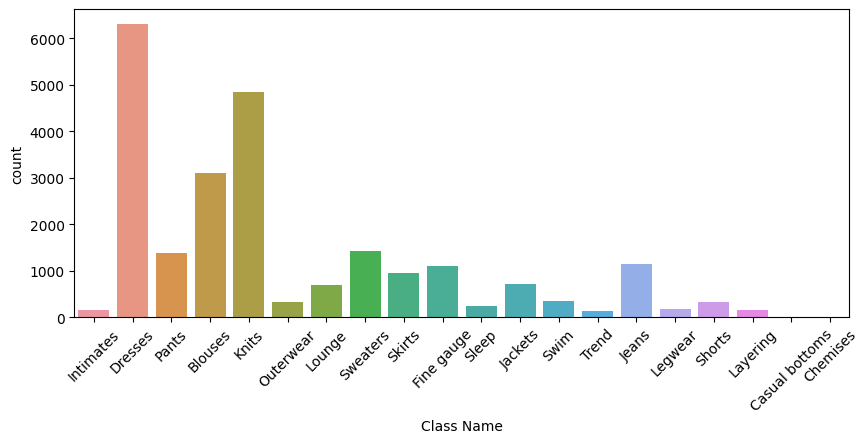

In [ ]:
# Plotting Popular and most purchase item
plt.figure(figsize = (10,4))
sns.countplot(x = 'Class Name', data = df)
plt.xticks(rotation = 45)
plt.show()
# Dresses, Knits and Blouses are bought the most by women.

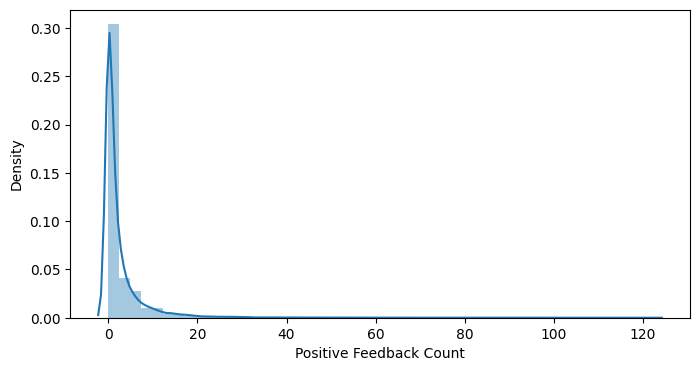

In [ ]:
# plotting the density of positive feedback count
plt.figure(figsize = (8,4))
sns.distplot(df['Positive Feedback Count'])
plt.show()

<Axes: >

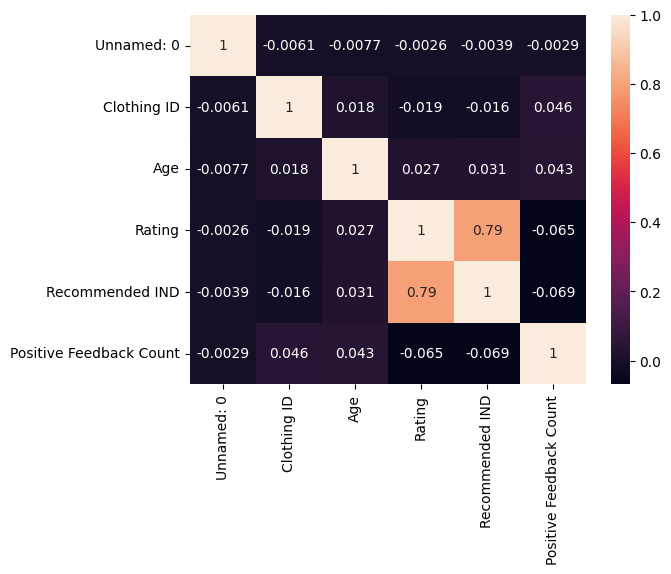

In [ ]:
# plot the heatmap
sns.heatmap(df.corr(), annot = True )

In [ ]:
# define independent and dependent dataset
x = df_upsampled["Cleaned_Review"]
y = df_upsampled["Recommended"]

In [ ]:
# Convert text to numerical feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fit dataset into model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# print the predicted and actual value of y
y_pred=model.predict(X_test)
print("Predicted Values: ")
print()
print(y_pred)
print()
print("Actual Values: ")
print()
print(y_test)
print()

Predicted Values: 

[1 1 0 ... 1 0 0]

Actual Values: 

6176     1
3454     1
11762    0
3071     0
20567    0
        ..
21687    1
1618     0
2889     1
10929    1
19751    0
Name: Recommended, Length: 6327, dtype: int64



In [ ]:
# calculate the evaluation metrics for the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ",precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ",recall)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ",f1)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(conf_mat)

Accuracy:  0.9012170064801643
Precision:  0.902201099198126
Recall:  0.901500038674699
F1 Score:  0.9011913262007432
Confusion Matrix: 
[[2902  227]
 [ 398 2800]]


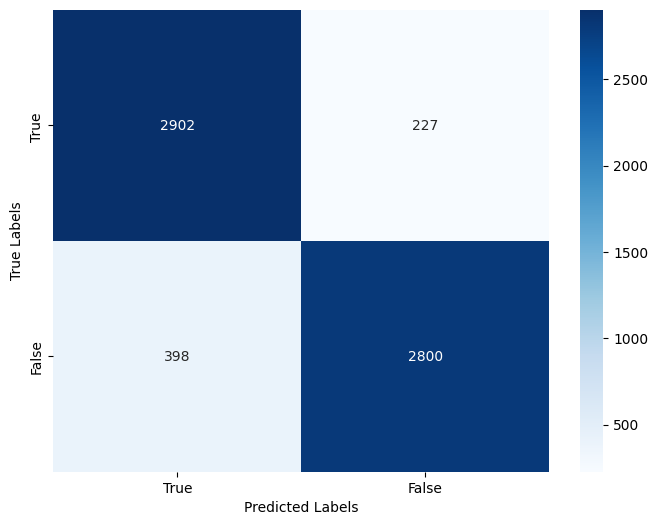

In [ ]:
# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',xticklabels=['True','False'],yticklabels=['True ','False'])
# annot=True: Indicates that the cell values should be annotated with the numeric values.
# fmt='d': Specifies the format for the cell values (in this case, as integers).
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Collect user input
review = input("Enter your review: ")

# Preprocess input
review = review.lower()  # Convert to lowercase
review = TextBlob(review)  # Create a TextBlob object for sentiment analysis
review_words = review.words  # Tokenize the text

# Analyze sentiment
polarity = review.sentiment.polarity

# Classify sentiment
if polarity == 0:
    sentiment = "Neutral"
elif polarity > 0:
    sentiment = "Positive"
else:
    sentiment = "Negative"

# Output result
print("Your review is:", sentiment)


Enter your review: it is just ok
Your review is: Positive
